In [42]:
import tensorflow as tf
import numpy as np

In [5]:
%matplotlib nbagg
import matplotlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt

In [6]:
import gym

In [7]:
env = gym.make('MsPacman-v0')

In [8]:
obs = env.reset()


In [9]:
obs.shape

(210, 160, 3)

In [10]:
img = env.render(mode="rgb_array")

<IPython.core.display.Javascript object>


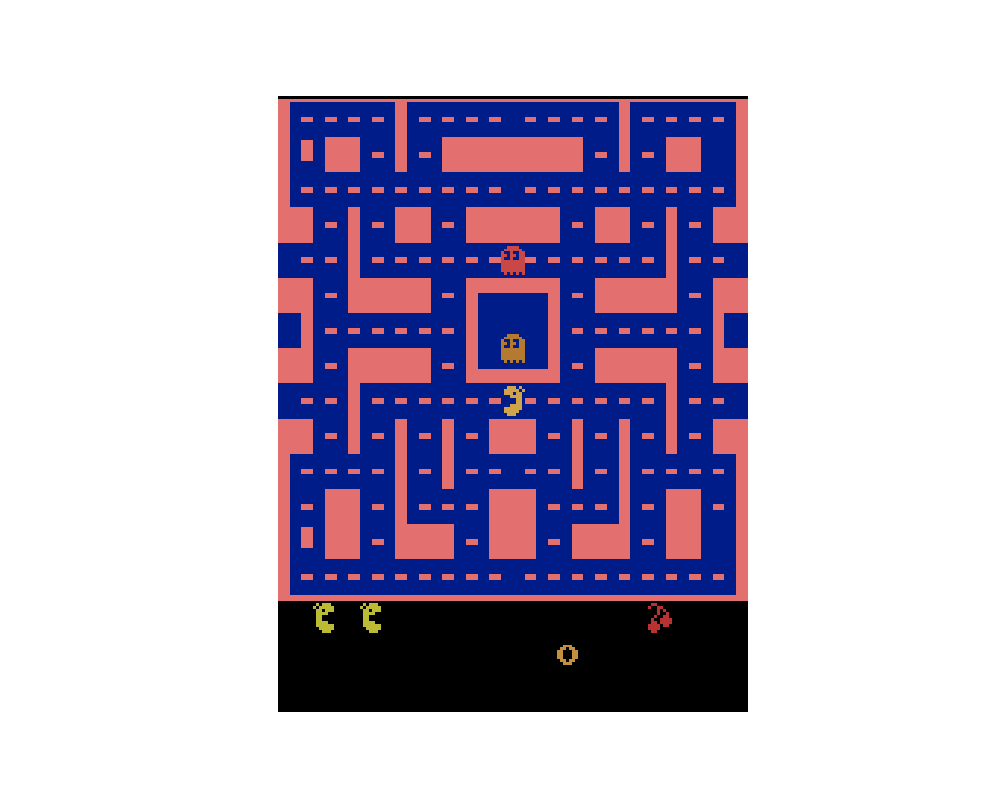

(-0.5, 159.5, 209.5, -0.5)

In [11]:
plt.figure(figsize=(5,4))
plt.imshow(img)
plt.axis("off")

In [12]:
(img == obs).all()

True

In [13]:
# Utility function to plot an environment

In [14]:
def plot_environment(env, figsize=(5,4)):
    plt.close()  
    plt.figure(figsize=figsize)
    img = env.render(mode="rgb_array")
    plt.imshow(img)
    plt.axis("off")

In [15]:
env.action_space

Discrete(9)

In [16]:
env.reset()
for step in range(110):
    env.step(2) 
for step in range(40):
    env.step(4) 

<IPython.core.display.Javascript object>


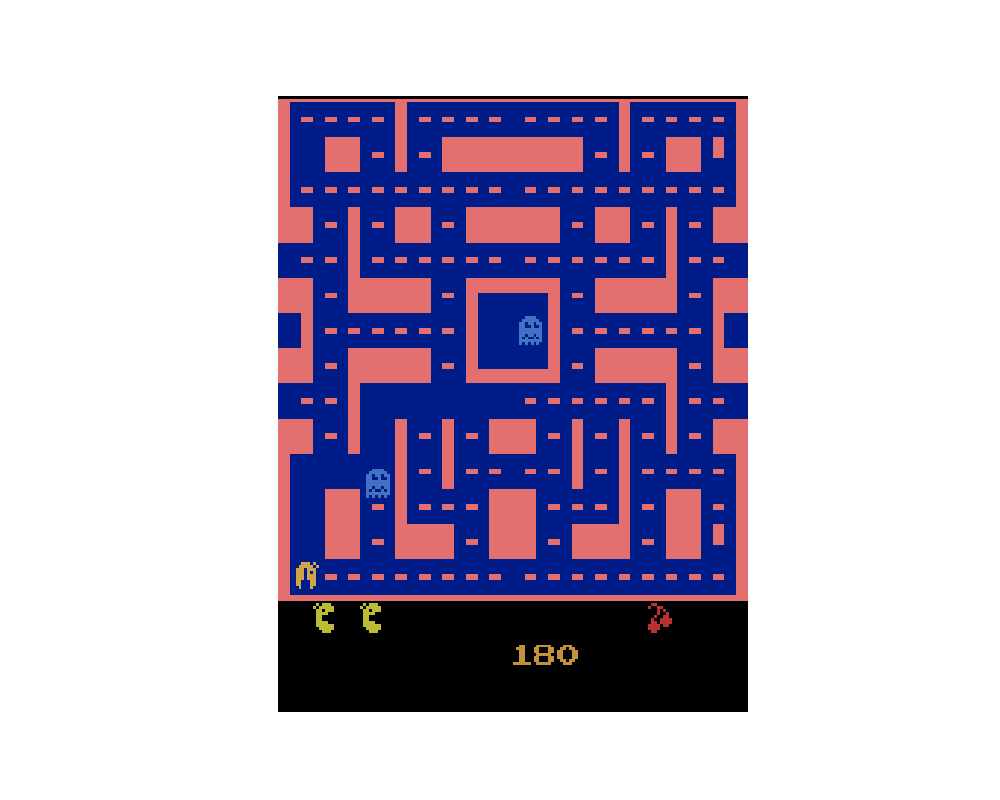

In [17]:
plot_environment(env)

In [17]:
obs, reward, done, info = env.step(0)

In [18]:
obs.shape

(210, 160, 3)

In [19]:
reward

0.0

In [20]:
done

False

In [21]:
info

{'ale.lives': 3}

In [22]:
frames = []

In [23]:
n_max_steps = 1000
n_change_steps = 10

In [24]:
obs = env.reset()

In [25]:
for step in range(n_max_steps):
    img = env.render(mode="rgb_array")
    frames.append(img)
    if step % n_change_steps == 0:
        action = env.action_space.sample() 
    obs, reward, done, info = env.step(action)
    if done:
        break

In [26]:
def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

In [27]:
def plot_animation(frames, repeat=False, interval=40):
    plt.close()  
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    return animation.FuncAnimation(fig, update_scene, fargs=(frames, patch), frames=len(frames), repeat=repeat, interval=interval)

<IPython.core.display.Javascript object>


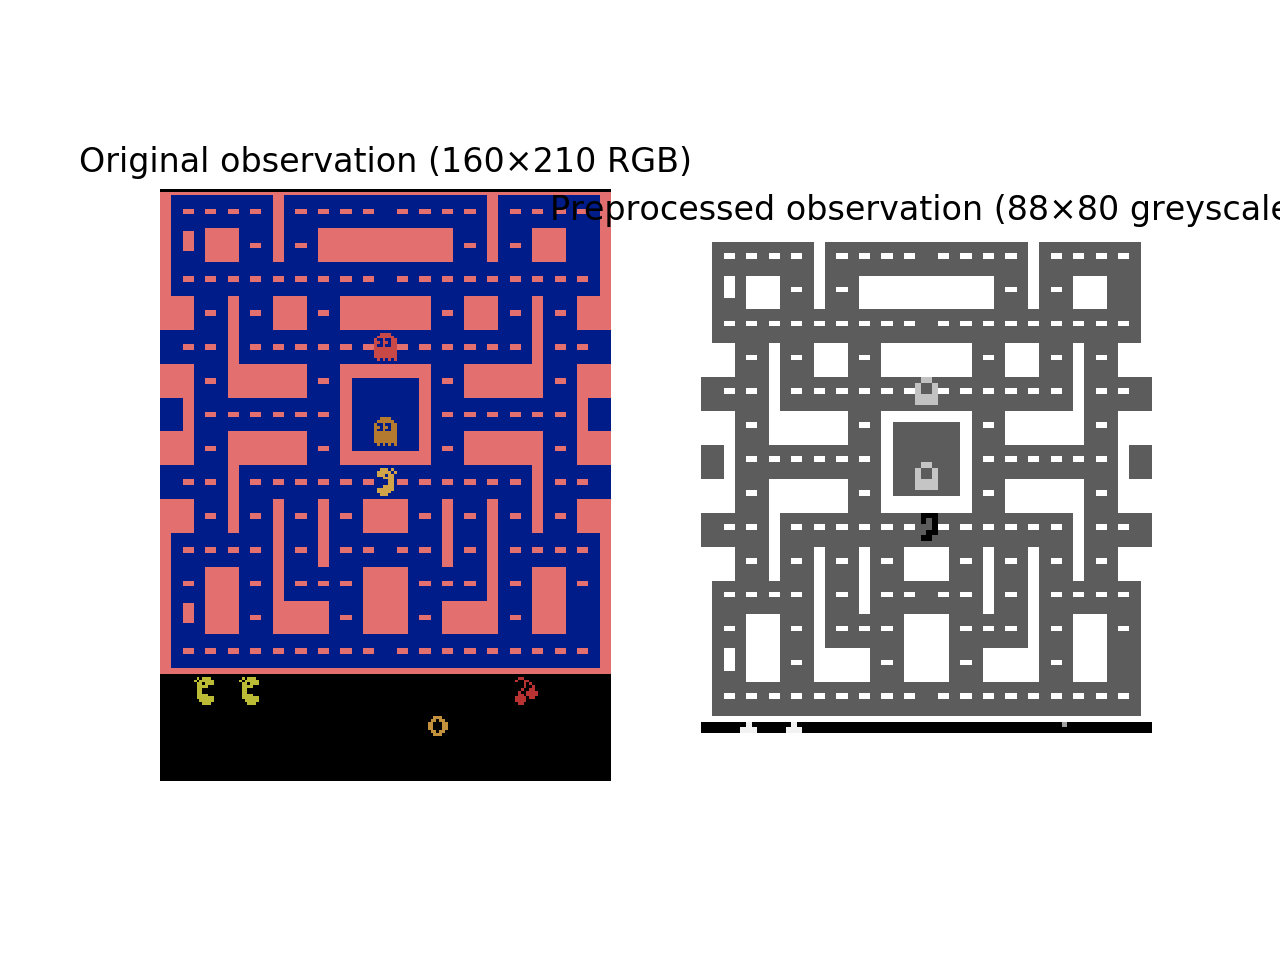

In [28]:
video = plot_animation(frames)

In [31]:
env.close()

# Markov Chain

In [38]:
transition_probabilities  = [
        [0.7, 0.2, 0.0, 0.1],  
        [0.0, 0.0, 0.9, 0.1],  
        [0.0, 1.0, 0.0, 0.0],  
        [0.0, 0.0, 0.0, 1.0],  
    ]

In [39]:
n_max_steps = 50

In [43]:
def print_sequence(start_state=0):
    current_state = start_state
    print("States:", end=" ")
    for step in range(n_max_steps):
        print(current_state, end=" ")
        if current_state == 3:
            break
        current_state = np.random.choice(range(4), p=transition_probabilities[current_state])
    else:
        print("...", end="")
    print()

In [44]:
for _ in range(10):
    print_sequence()

States: 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3 
States: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 3 
States: 0 0 0 0 0 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3 
States: 0 3 
States: 0 0 0 1 2 1 2 1 2 1 2 1 2 1 3 
States: 0 0 3 
States: 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 ...
States: 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 ...
States: 0 0 3 
States: 0 0 0 3 


# MDP

In [45]:
transition_probabilities = [
        [[0.7, 0.3, 0.0], [1.0, 0.0, 0.0], [0.8, 0.2, 0.0]], 
        [[0.0, 1.0, 0.0], None, [0.0, 0.0, 1.0]],
        [None, [0.8, 0.1, 0.1], None],
    ]

In [46]:
rewards = [
        [[+10, 0, 0], [0, 0, 0], [0, 0, 0]],
        [[0, 0, 0], [0, 0, 0], [0, 0, -50]],
        [[0, 0, 0], [+40, 0, 0], [0, 0, 0]],
    ]

In [48]:
possible_actions = [[0, 1, 2], [0, 2], [1]]

In [49]:
def policy_fire(state):
    return [0, 2, 1][state]

In [50]:
def policy_random(state):
    return np.random.choice(possible_actions[state])


In [51]:
def policy_safe(state):
    return [0, 0, 1][state]

In [52]:
class MDPEnvironment(object):
    def __init__(self, start_state=0):
        self.start_state=start_state
        self.reset()
    def reset(self):
        self.total_rewards = 0
        self.state = self.start_state
    def step(self, action):
        next_state = np.random.choice(range(3), p=transition_probabilities[self.state][action])
        reward = rewards[self.state][action][next_state]
        self.state = next_state
        self.total_rewards += reward
        return self.state, reward

In [53]:
def run_episode(policy, n_steps, start_state=0, display=True):
    env = MDPEnvironment()
    if display:
        print("States (+rewards):", end=" ")
    for step in range(n_steps):
        if display:
            if step == 10:
                print("...", end=" ")
            elif step < 10:
                print(env.state, end=" ")
        action = policy(env.state)
        state, reward = env.step(action)
        if display and step < 10:
            if reward:
                print("({})".format(reward), end=" ")
    if display:
        print("Total rewards =", env.total_rewards)
    return env.total_rewards

In [54]:
for policy in (policy_fire, policy_random, policy_safe):
    all_totals = []
    print(policy.__name__)
    for episode in range(1000):
        all_totals.append(run_episode(policy, n_steps=100, display=(episode<5)))
    print("Summary: mean={:.1f}, std={:1f}, min={}, max={}".format(np.mean(all_totals), np.std(all_totals), np.min(all_totals), np.max(all_totals)))
    print()

policy_fire
States (+rewards): 0 (10) 0 (10) 0 1 (-50) 2 (40) 0 (10) 0 (10) 0 (10) 0 1 (-50) ... Total rewards = 10
States (+rewards): 0 (10) 0 (10) 0 (10) 0 1 (-50) 2 (40) 0 (10) 0 (10) 0 (10) 0 (10) ... Total rewards = -90
States (+rewards): 0 (10) 0 (10) 0 1 (-50) 2 2 (40) 0 (10) 0 1 (-50) 2 ... Total rewards = -20
States (+rewards): 0 1 (-50) 2 2 (40) 0 1 (-50) 2 (40) 0 1 (-50) 2 (40) ... Total rewards = 240
States (+rewards): 0 (10) 0 (10) 0 (10) 0 (10) 0 1 (-50) 2 (40) 0 1 (-50) 2 (40) ... Total rewards = 290
Summary: mean=124.5, std=127.613283, min=-270, max=470

policy_random
States (+rewards): 0 1 (-50) 2 (40) 0 (10) 0 0 0 1 (-50) 2 (40) 0 (10) ... Total rewards = -10
States (+rewards): 0 0 0 (10) 0 0 0 (10) 0 0 0 1 (-50) ... Total rewards = -100
States (+rewards): 0 0 0 0 (10) 0 0 (10) 0 0 0 (10) 0 ... Total rewards = -20
States (+rewards): 0 0 0 0 0 (10) 0 0 0 0 0 ... Total rewards = 20
States (+rewards): 0 0 0 0 0 0 0 0 1 (-50) 2 (40) ... Total rewards = -60
Summary: mean=-

# Q-Learning

In [55]:
n_states = 3
n_actions = 3
n_steps = 20000
alpha = 0.01
gamma = 0.99

In [56]:
exploration_policy = policy_random
q_values = np.full((n_states, n_actions), -np.inf)

In [57]:
for state, actions in enumerate(possible_actions):
    q_values[state][actions]=0

In [58]:
env = MDPEnvironment()

In [60]:
for step in range(n_steps):
    action = exploration_policy(env.state)
    state = env.state
    next_state, reward = env.step(action)
    next_value = np.max(q_values[next_state]) 
    q_values[state, action] = (1-alpha)*q_values[state, action] + alpha*(reward + gamma * next_value)


In [61]:
def optimal_policy(state):
    return np.argmax(q_values[state])

In [62]:
q_values

array([[ 67.70987863,  66.54615953,  63.2959956 ],
       [ 46.29791403,         -inf,  48.09783613],
       [        -inf, 100.82756964,         -inf]])

In [63]:
all_totals = []

In [64]:
for episode in range(1000):
    all_totals.append(run_episode(optimal_policy, n_steps=100, display=(episode<5)))
print("Summary: mean={:.1f}, std={:1f}, min={}, max={}".format(np.mean(all_totals), np.std(all_totals), np.min(all_totals), np.max(all_totals)))
print()

States (+rewards): 0 (10) 0 (10) 0 (10) 0 (10) 0 (10) 0 (10) 0 (10) 0 (10) 0 (10) 0 (10) ... Total rewards = 300
States (+rewards): 0 (10) 0 1 (-50) 2 (40) 0 1 (-50) 2 (40) 0 (10) 0 (10) 0 (10) ... Total rewards = 50
States (+rewards): 0 (10) 0 (10) 0 (10) 0 1 (-50) 2 (40) 0 1 (-50) 2 (40) 0 ... Total rewards = 220
States (+rewards): 0 (10) 0 (10) 0 (10) 0 (10) 0 (10) 0 (10) 0 (10) 0 (10) 0 (10) 0 (10) ... Total rewards = 210
States (+rewards): 0 1 (-50) 2 1 (-50) 2 (40) 0 (10) 0 (10) 0 (10) 0 (10) 0 (10) ... Total rewards = 80
Summary: mean=116.4, std=136.650267, min=-360, max=540



# DQN - Play Pacman

In [66]:
env = gym.make("MsPacman-v0")
obs = env.reset()
obs.shape

(210, 160, 3)

In [67]:
env.action_space

Discrete(9)

In [68]:
mspacman_color = 210 + 164 + 74


In [70]:
def preprocess_observation(obs):
    img = obs[1:176:2, ::2] 
    img = img.sum(axis=2) 
    img[img==mspacman_color] = 0 
    img = (img // 3 - 128).astype(np.int8) 
    return img.reshape(88, 80, 1)

In [71]:
img = preprocess_observation(obs)

<IPython.core.display.Javascript object>


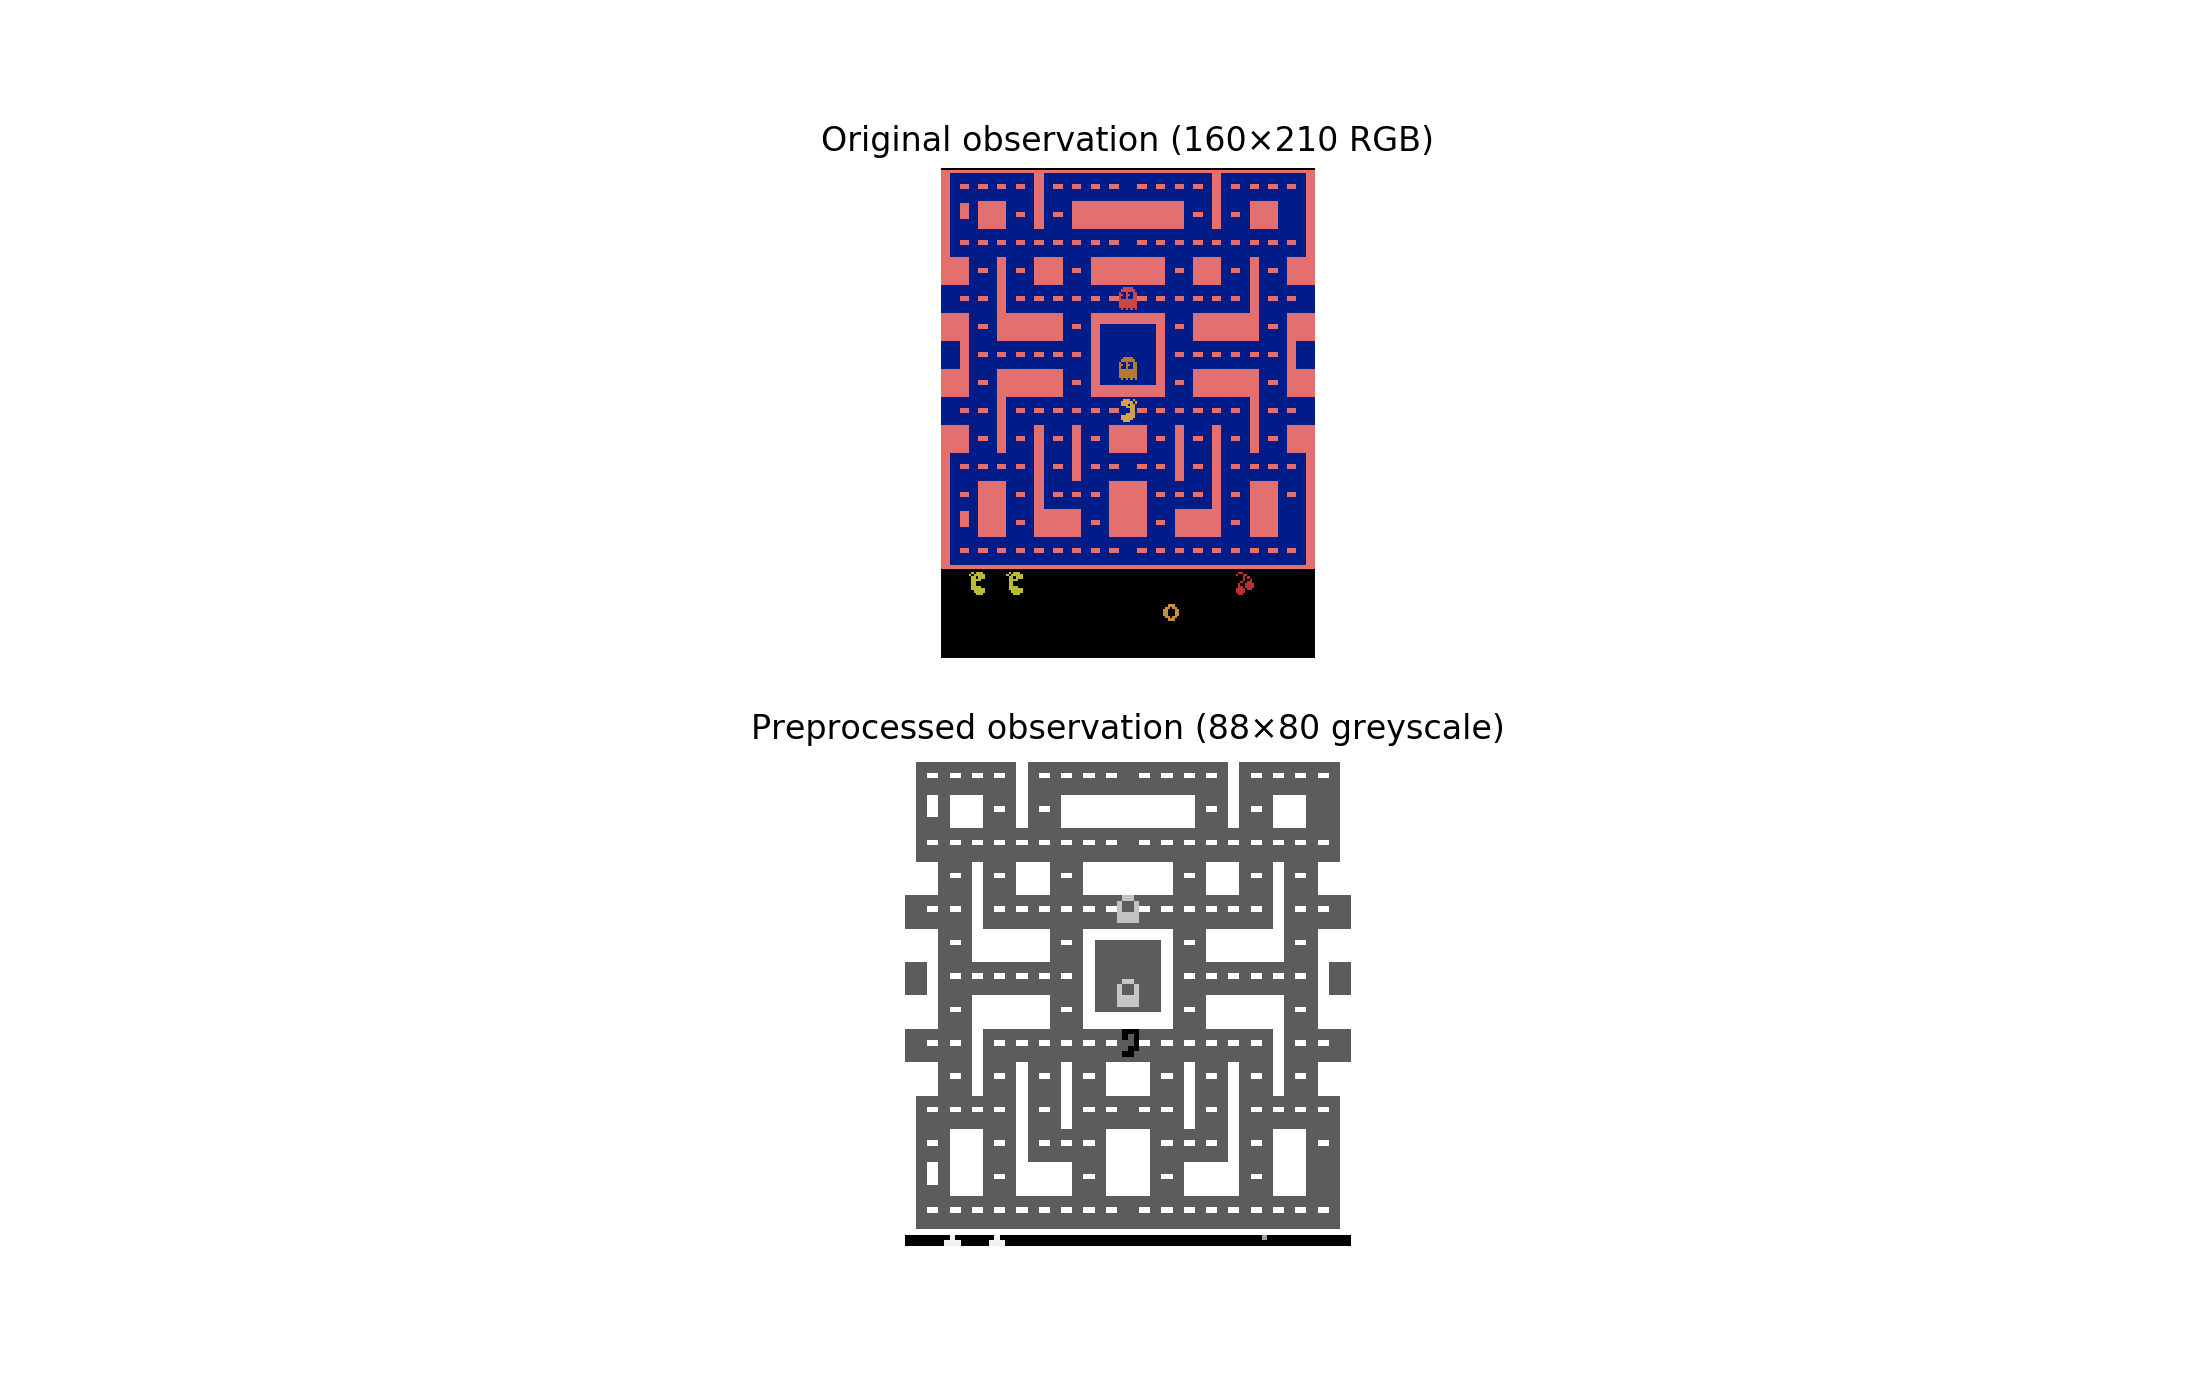

(-0.5, 79.5, 87.5, -0.5)

In [81]:
plt.figure(figsize=(11, 7))
plt.subplot(2, 1, 1)
plt.title("Original observation (160×210 RGB)")
plt.imshow(obs)
plt.axis("off")
plt.subplot(2, 1, 2)
plt.title("Preprocessed observation (88×80 greyscale)")
plt.imshow(img.reshape(88, 80), interpolation="nearest", cmap="gray")
plt.axis("off")

In [82]:
tf.reset_default_graph()

In [83]:
input_height = 88
input_width = 80
input_channels = 1
conv_n_maps = [32, 64, 64]
conv_kernel_sizes = [(8,8), (4,4), (3,3)]
conv_strides = [4, 2, 1]
conv_paddings = ["SAME"] * 3 
conv_activation = [tf.nn.relu] * 3
n_hidden_in = 64 * 11 * 10  
n_hidden = 512
hidden_activation = tf.nn.relu
n_outputs = env.action_space.n 

In [85]:
initializer = tf.variance_scaling_initializer()

In [86]:
def q_network(X_state, name):
    prev_layer = X_state / 128.0 
    with tf.variable_scope(name) as scope:
        for n_maps, kernel_size, strides, padding, activation in zip(
                conv_n_maps, conv_kernel_sizes, conv_strides,
                conv_paddings, conv_activation):
            prev_layer = tf.layers.conv2d(
                prev_layer, filters=n_maps, kernel_size=kernel_size,
                strides=strides, padding=padding, activation=activation,
                kernel_initializer=initializer)
        last_conv_layer_flat = tf.reshape(prev_layer, shape=[-1, n_hidden_in])
        hidden = tf.layers.dense(last_conv_layer_flat, n_hidden,
                                 activation=hidden_activation,
                                 kernel_initializer=initializer)
        outputs = tf.layers.dense(hidden, n_outputs,
                                  kernel_initializer=initializer)
    trainable_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES,
                                       scope=scope.name)
    trainable_vars_by_name = {var.name[len(scope.name):]: var
                              for var in trainable_vars}
    return outputs, trainable_vars_by_name

In [87]:
X_state = tf.placeholder(tf.float32, shape=[None, input_height, input_width,
                                            input_channels])

In [88]:
online_q_values, online_vars = q_network(X_state, name="q_networks/online")
target_q_values, target_vars = q_network(X_state, name="q_networks/target")

In [89]:
copy_ops = [target_var.assign(online_vars[var_name])
            for var_name, target_var in target_vars.items()]
copy_online_to_target = tf.group(*copy_ops)

In [90]:
online_vars

{'/conv2d/bias:0': <tf.Variable 'q_networks/online/conv2d/bias:0' shape=(32,) dtype=float32_ref>,
 '/conv2d/kernel:0': <tf.Variable 'q_networks/online/conv2d/kernel:0' shape=(8, 8, 1, 32) dtype=float32_ref>,
 '/conv2d_1/bias:0': <tf.Variable 'q_networks/online/conv2d_1/bias:0' shape=(64,) dtype=float32_ref>,
 '/conv2d_1/kernel:0': <tf.Variable 'q_networks/online/conv2d_1/kernel:0' shape=(4, 4, 32, 64) dtype=float32_ref>,
 '/conv2d_2/bias:0': <tf.Variable 'q_networks/online/conv2d_2/bias:0' shape=(64,) dtype=float32_ref>,
 '/conv2d_2/kernel:0': <tf.Variable 'q_networks/online/conv2d_2/kernel:0' shape=(3, 3, 64, 64) dtype=float32_ref>,
 '/dense/bias:0': <tf.Variable 'q_networks/online/dense/bias:0' shape=(512,) dtype=float32_ref>,
 '/dense/kernel:0': <tf.Variable 'q_networks/online/dense/kernel:0' shape=(7040, 512) dtype=float32_ref>,
 '/dense_1/bias:0': <tf.Variable 'q_networks/online/dense_1/bias:0' shape=(9,) dtype=float32_ref>,
 '/dense_1/kernel:0': <tf.Variable 'q_networks/online/de

In [91]:
learning_rate = 0.001
momentum = 0.95


In [92]:
with tf.variable_scope("train"):
    X_action = tf.placeholder(tf.int32, shape=[None])
    y = tf.placeholder(tf.float32, shape=[None, 1])
    q_value = tf.reduce_sum(online_q_values * tf.one_hot(X_action, n_outputs),
                            axis=1, keepdims=True)
    error = tf.abs(y - q_value)
    clipped_error = tf.clip_by_value(error, 0.0, 1.0)
    linear_error = 2 * (error - clipped_error)
    loss = tf.reduce_mean(tf.square(clipped_error) + linear_error)

    global_step = tf.Variable(0, trainable=False, name='global_step')
    optimizer = tf.train.MomentumOptimizer(learning_rate, momentum, use_nesterov=True)
    training_op = optimizer.minimize(loss, global_step=global_step)

In [93]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [94]:
class ReplayMemory:
    def __init__(self, maxlen):
        self.maxlen = maxlen
        self.buf = np.empty(shape=maxlen, dtype=np.object)
        self.index = 0
        self.length = 0
        
    def append(self, data):
        self.buf[self.index] = data
        self.length = min(self.length + 1, self.maxlen)
        self.index = (self.index + 1) % self.maxlen
    
    def sample(self, batch_size, with_replacement=True):
        if with_replacement:
            indices = np.random.randint(self.length, size=batch_size) # faster
        else:
            indices = np.random.permutation(self.length)[:batch_size]
        return self.buf[indices]

In [95]:
replay_memory_size = 500000
replay_memory = ReplayMemory(replay_memory_size)

In [96]:
def sample_memories(batch_size):
    cols = [[], [], [], [], []] 
    for memory in replay_memory.sample(batch_size):
        for col, value in zip(cols, memory):
            col.append(value)
    cols = [np.array(col) for col in cols]
    return cols[0], cols[1], cols[2].reshape(-1, 1), cols[3], cols[4].reshape(-1, 1)

In [97]:
eps_min = 0.1
eps_max = 1.0
eps_decay_steps = 2000000

In [98]:
def epsilon_greedy(q_values, step):
    epsilon = max(eps_min, eps_max - (eps_max-eps_min) * step/eps_decay_steps)
    if np.random.rand() < epsilon:
        return np.random.randint(n_outputs) 
    else:
        return np.argmax(q_values) 

In [99]:
n_steps = 4000000  
training_start = 10000  
training_interval = 4  
save_steps = 1000  
copy_steps = 10000  
discount_rate = 0.99
skip_start = 90  
batch_size = 50
iteration = 0  
checkpoint_path = "./my_dqn.ckpt"
done = True 

In [102]:
loss_val = np.infty
game_length = 0
total_max_q = 0
mean_max_q = 0.0

In [103]:
import os

In [ ]:
with tf.Session() as sess:
    if os.path.isfile(checkpoint_path + ".index"):
        saver.restore(sess, checkpoint_path)
    else:
        init.run()
        copy_online_to_target.run()
    while True:
        step = global_step.eval()
        if step >= n_steps:
            break
        iteration += 1
        print("\rIteration {}\tTraining step {}/{} ({:.1f})%\tLoss {:5f}\tMean Max-Q {:5f}   ".format(
            iteration, step, n_steps, step * 100 / n_steps, loss_val, mean_max_q), end="")
        if done:
            obs = env.reset()
            for skip in range(skip_start): 
                obs, reward, done, info = env.step(0)
            state = preprocess_observation(obs)

        q_values = online_q_values.eval(feed_dict={X_state: [state]})
        action = epsilon_greedy(q_values, step)

        obs, reward, done, info = env.step(action)
        next_state = preprocess_observation(obs)

        replay_memory.append((state, action, reward, next_state, 1.0 - done))
        state = next_state

        total_max_q += q_values.max()
        game_length += 1
        if done:
            mean_max_q = total_max_q / game_length
            total_max_q = 0.0
            game_length = 0

        if iteration < training_start or iteration % training_interval != 0:
            continue 
        
        X_state_val, X_action_val, rewards, X_next_state_val, continues = (
            sample_memories(batch_size))
        next_q_values = target_q_values.eval(
            feed_dict={X_state: X_next_state_val})
        max_next_q_values = np.max(next_q_values, axis=1, keepdims=True)
        y_val = rewards + continues * discount_rate * max_next_q_values

        _, loss_val = sess.run([training_op, loss], feed_dict={
            X_state: X_state_val, X_action: X_action_val, y: y_val})

        if step % copy_steps == 0:
            copy_online_to_target.run()

        if step % save_steps == 0:
            saver.save(sess, checkpoint_path)


INFO:tensorflow:Restoring parameters from ./my_dqn.ckpt
Iteration 11323	Training step 18/4000000 (0.0)%	Loss 0.380260	Mean Max-Q 0.119019   

In [109]:
frames = []
n_max_steps = 10000

In [110]:
with tf.Session() as sess:
    saver.restore(sess, checkpoint_path)

    obs = env.reset()
    for step in range(n_max_steps):
        state = preprocess_observation(obs)

        q_values = online_q_values.eval(feed_dict={X_state: [state]})
        action = np.argmax(q_values)

        obs, reward, done, info = env.step(action)

        img = env.render(mode="rgb_array")
        frames.append(img)

        if done:
            break

INFO:tensorflow:Restoring parameters from ./my_dqn.ckpt


<IPython.core.display.Javascript object>


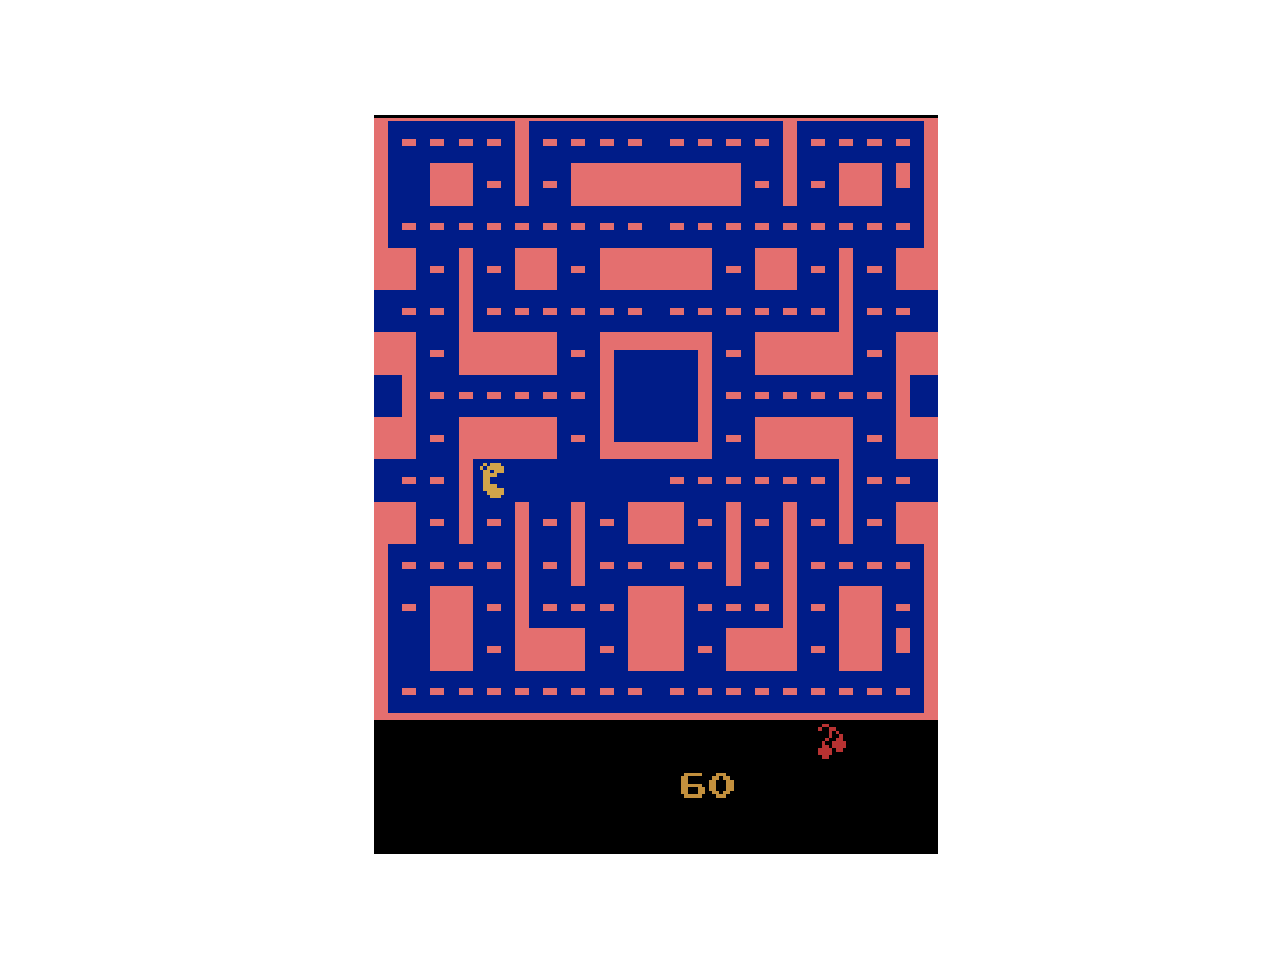

In [111]:
plot_animation(frames)